In [1]:
# Импорт необходимых библиотек
import numpy as np               # Библиотека для работы с массивами и матрицами
import pandas as pd              # Библиотека для обработки и анализа данных, предоставляет структуры данных DataFrame
import matplotlib.pyplot as plt  # Библиотека для визуализации данных
import seaborn as sns            # Библиотека для красивой визуализации данных на базе matplotlib
import statsmodels.api as sm     # Библиотека для статистических моделей и тестов
import sklearn as sk             # Библиотека для машинного обучения
import scipy as sp               # Библиотека для научных вычислений и статистики
# Импортируем модуль drive из библиотеки google.colab для работы с Google Drive
from google.colab import drive

In [2]:
import json
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm

In [3]:
# Монтируем Google Drive для доступа к файлам и папкам
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

# Используем параметр lines=True, если JSON-файл состоит из строк JSON
growth = pd.read_json('/content/drive/MyDrive/vacancies_1.json', lines=True)

In [5]:
with open('/content/drive/MyDrive/vacancies_1.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

<ipython-input-27-d2e1514550d1>:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(color_map)(range(len(labels)))


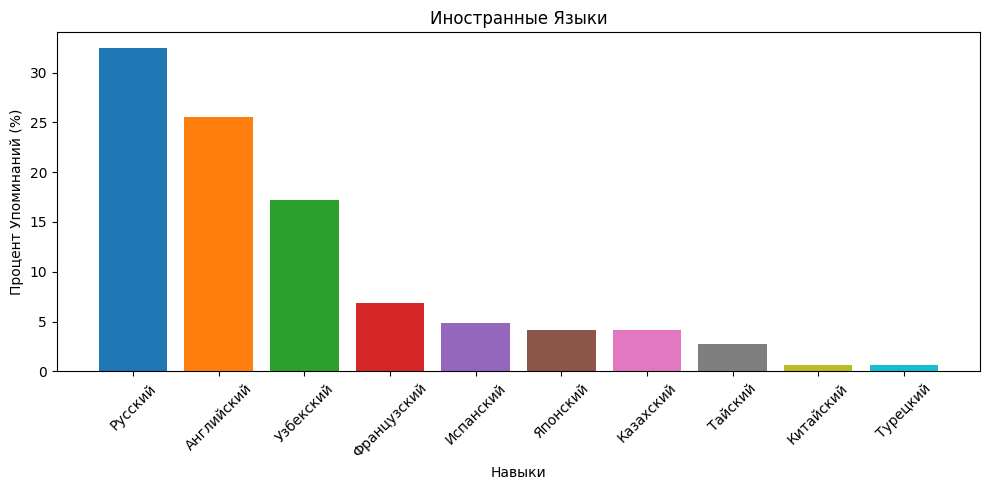

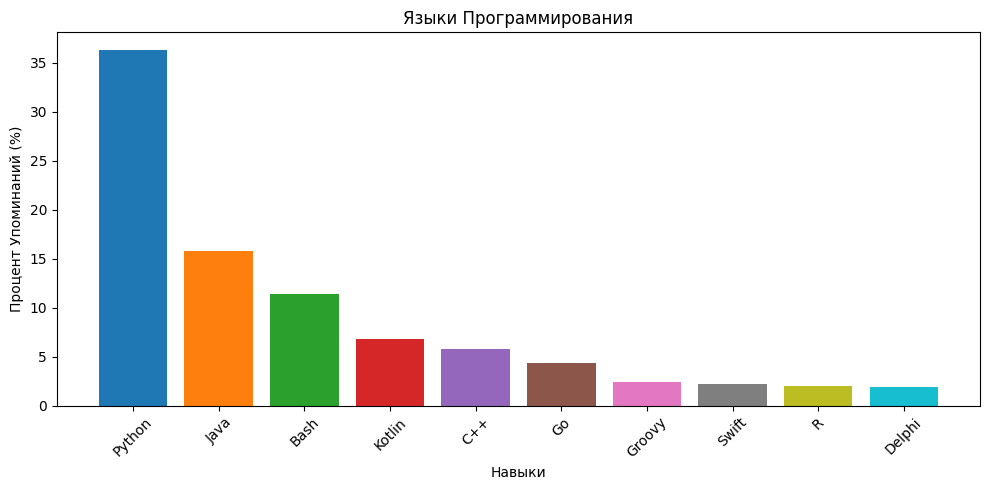

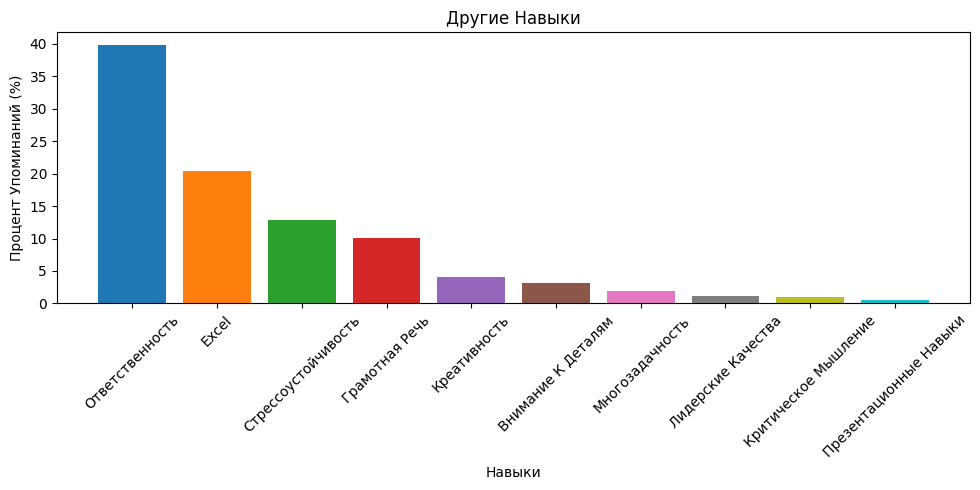

<ipython-input-27-d2e1514550d1>:128: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(color_map)(range(len(labels)))


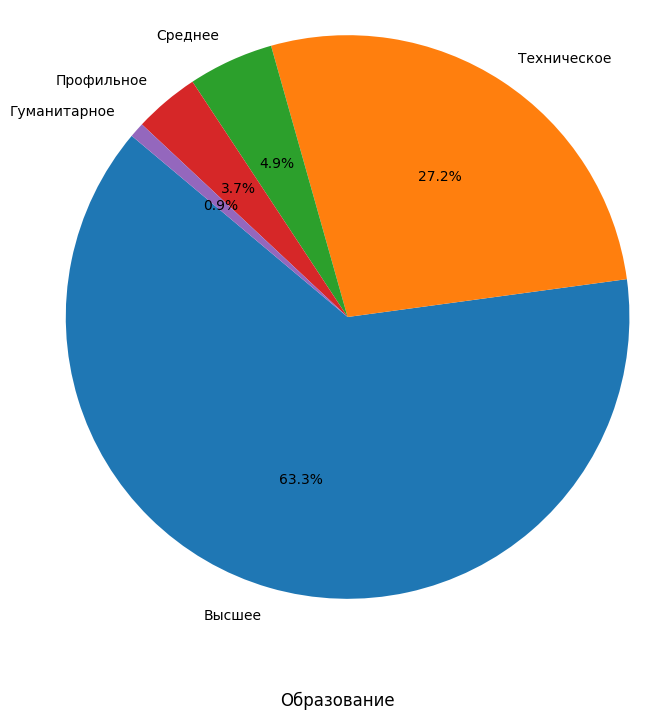

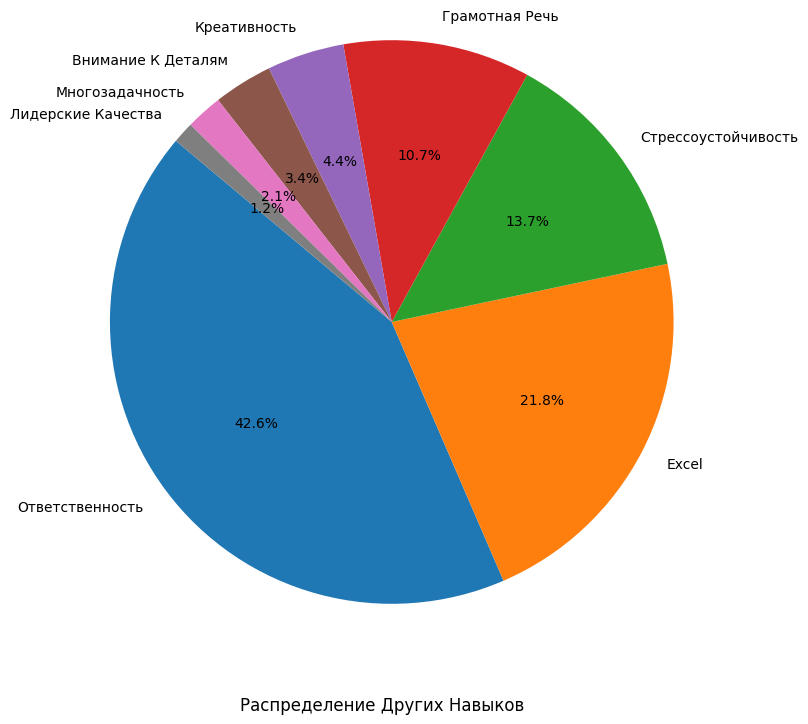

In [27]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Создание DataFrame
df = pd.DataFrame(data)

# Извлечение ключевых слов из поля 'requirement' в 'snippet'
df['keywords'] = df['snippet'].apply(lambda x: x['requirement'] if 'requirement' in x else '')

# Функция для парсинга ключевых навыков
def parse_keywords(text):
    if not text:
        return []
    skills = text.replace('. ', ', ').replace(' и ', ', ').split(', ')
    return [skill.strip().title() for skill in skills if skill]

# Применение функции к DataFrame
df['keywords'] = df['keywords'].apply(parse_keywords)

# Создание словаря частоты упоминания ключевых слов
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]
counter = Counter(all_keywords)

# Функция отфильтровать ключевые слова
def filter_skills(counter, skill_set):
    return Counter({k: v for k, v in counter.items() if k in skill_set})

# Задание списков ключевых навыков
foreign_languages = set([
    'Английский', 'Немецкий', 'Французский', 'Испанский',
    'Итальянский', 'Португальский', 'Русский', 'Китайский',
    'Японский', 'Корейский', 'Арабский', 'Хинди', 'Бенгальский',
    'Турецкий', 'Вьетнамский', 'Персидский', 'Польский',
    'Украинский', 'Голландский', 'Греческий', 'Шведский',
    'Норвежский', 'Датский', 'Финский', 'Чешский',
    'Румынский', 'Венгерский', 'Словацкий', 'Болгарский',
    'Сербский', 'Хорватский', 'Боснийский', 'Словенский',
    'Македонский', 'Грузинский', 'Азербайджанский',
    'Армянский', 'Казахский', 'Узбекский', 'Туркменский',
    'Таджикский', 'Киргизский', 'Албанский', 'Филиппинский',
    'Эстонский', 'Латышский', 'Литовский', 'Исландский',
    'Малайский', 'Индонезийский', 'Суахили', 'Зулу',
    'Йоруба', 'Хауса', 'Амхарский', 'Сомалийский',
    'Непальский', 'Сингальский', 'Пушту', 'Урду',
    'Тайский', 'Лаоский', 'Бирманский', 'Монгольский'
])
programming_languages = set([
    'Python', 'Java', 'C++', 'JavaScript', 'SQL',
    'Ruby', 'PHP', 'Swift', 'Kotlin', 'Go',
    'R', 'Perl', 'TypeScript', 'Scala', 'Rust',
    'Haskell', 'Lua', 'Matlab', 'Groovy', 'Dart',
    'Objective-C', 'Shell', 'Assembly', 'Bash', 'VBA',
    'Pascal', 'Delphi', 'Fortran', 'COBOL', 'Clojure',
    'Elixir', 'F#', 'Julia', 'Ada', 'Erlang',
    'Common Lisp', 'Prolog', 'Scheme', 'OCaml', 'Smalltalk',
    'Tcl', 'Visual Basic', 'AWK', 'Logo', 'Forth'
])
other_skills = set([
    'Excel', 'Макрос', 'html', 'Управление Проектами',
    'Аналитика', 'Коммуникация', 'Soft Skills',
    'Внимание К Деталям', 'Критическое Мышление', 'Управление Временем',
    'Адаптивность', 'Креативность', 'Решение Проблем',
    'Самомотивация', 'Командная Работа', 'Управление Конфликтами',
    'Ведение Переговоров', 'Эмоциональный Интеллект',
    'Организационные Навыки', 'Лидерские Качества',
    'Обучение И Развитие', 'Умение Слушать', 'Точность',
    'Многозадачность', 'Ответственность', 'Стрессоустойчивость',
    'Работа С Большим Объемом Информации', 'Документирование',
    'Деловая Переписка', 'Презентационные Навыки',
    'Разработка Стратегии', 'Исследовательские Навыки',
    'Навыки Планирования', 'Приоритизация Задач',
    'Time Management', 'Условия Труда', 'Финансовая Грамотность',
    'Маркетинговые Навыки', 'Активное Слушание', 'Перфекционизм',
    'Гибкость Мышления', 'Наработка Опыта', 'Аудит',
    'Делегирование', 'Разработка Требований',
    'Написание Документации', 'Грамотная Речь',
    'Публичные Выступления', 'Ответственность'
])
education = set(['Техническое', 'Высшее', 'Среднее', 'Профильное', 'Гуманитарное'])

# Фильтрация ключевых навыков по категориям
foreign_language_counter = filter_skills(counter, foreign_languages)
programming_language_counter = filter_skills(counter, programming_languages)
other_skills_counter = filter_skills(counter, other_skills)
education_counter = filter_skills(counter, education)

# Функция для вычисления процентного соотношения
def convert_to_percentage(counter):
    total = sum(counter.values())
    return {k: (v / total) * 100 for k, v in counter.items()}

# Конвертация частоты в проценты
foreign_language_percentage = convert_to_percentage(foreign_language_counter)
programming_language_percentage = convert_to_percentage(programming_language_counter)
other_skills_percentage = convert_to_percentage(other_skills_counter)
education_percentage = convert_to_percentage(education_counter)

# Функция для создания графиков с процентами
def plot_percentage(counter, title, color_map='tab10'):
    if not counter:  # Проверка, не пустой ли словарь
        print(f"Нет данных для категории '{title}'")
        return
    # Сортируем и берем первые 10 элементов
    sorted_counter = sorted(counter.items(), key=lambda item: item[1], reverse=True)[:10]
    labels, values = zip(*sorted_counter)

    plt.figure(figsize=(10, 5))
    colors = cm.get_cmap(color_map)(range(len(labels)))
    plt.bar(labels, values, color=colors)
    plt.title(title)
    plt.xlabel('Навыки')
    plt.ylabel('Процент Упоминаний (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def create_pie_chart(counter, title, color_map='tab10'):
    if not counter:  # Проверка, не пустой ли словарь
        print(f"Нет данных для категории '{title}'")
        return
    # Сортируем и берем первые 10 элементов
    sorted_counter = sorted(counter.items(), key=lambda item: item[1], reverse=True)[:8]
    labels, values = zip(*sorted_counter)

    plt.figure(figsize=(8, 8))
    colors = cm.get_cmap(color_map)(range(len(labels)))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("")  # Устанавливаем пустой заголовок
    plt.axis('equal')  # Для круговой формы
    plt.figtext(0.5, 0.01, title, ha="center", fontsize=12)  # Добавляем заголовок внизу диаграммы
    plt.show()

# Отображение графиков
plot_percentage(foreign_language_percentage, 'Иностранные Языки')
plot_percentage(programming_language_percentage, 'Языки Программирования')
plot_percentage(other_skills_percentage, 'Другие Навыки')
create_pie_chart(education_percentage, 'Образование')
create_pie_chart(other_skills_percentage, 'Распределение Других Навыков')

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
# Извлечение даты публикации и зарплат
df['published_at'] = pd.to_datetime(df['published_at'])
df['day_of_week'] = df['published_at'].dt.day_name()
df['time_of_day'] = df['published_at'].dt.hour


# Извлечение информации о зарплатах
# Предполагаем, что в JSON файле есть поля 'salary_from', 'salary_to' и 'published_at'
df['salary_from'] = df['salary'].apply(lambda x: x['from'] if x and 'from' in x else None)
df['salary_to'] = df['salary'].apply(lambda x: x['to'] if x and 'to' in x else None)
df['published_at'] = pd.to_datetime(df['published_at'])

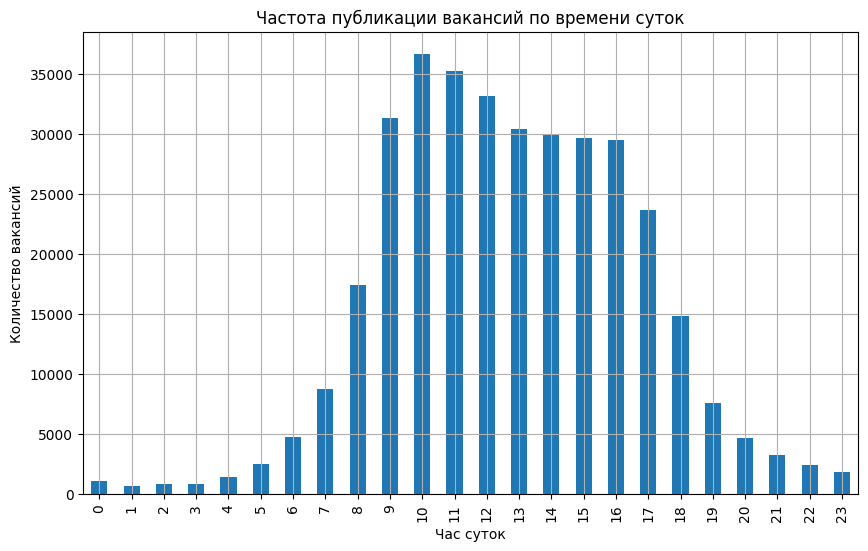

In [13]:
plt.figure(figsize=(10, 6))
df['time_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Частота публикации вакансий по времени суток')
plt.xlabel('Час суток')
plt.ylabel('Количество вакансий')
plt.grid(True)
plt.show()

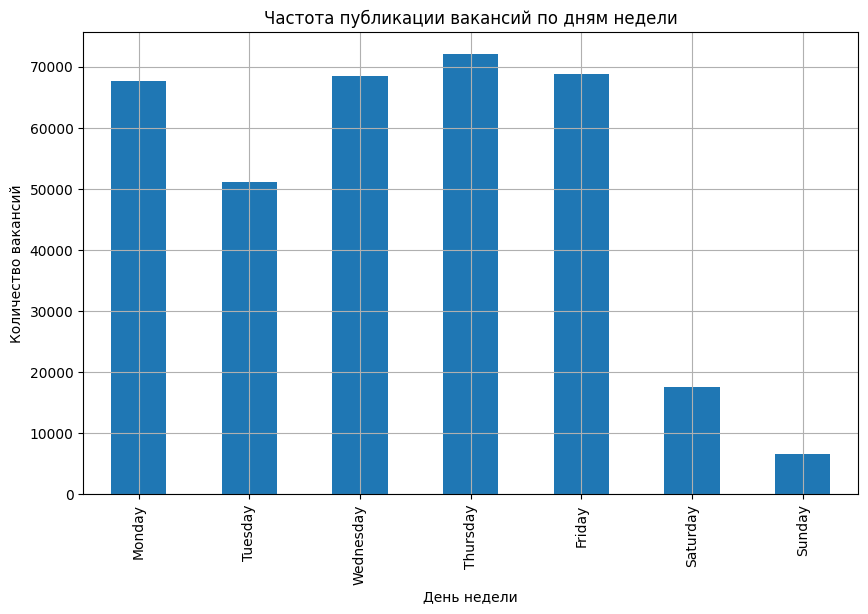

In [14]:
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Частота публикации вакансий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество вакансий')
plt.grid(True)
plt.show()

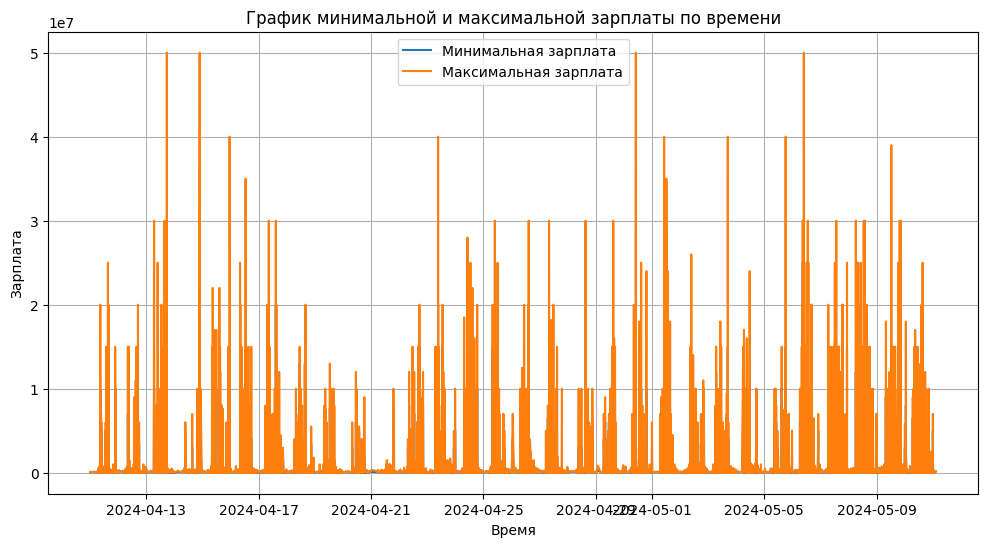

In [40]:
# Сгруппируем данные по времени и найдем минимальные и максимальные зарплаты
grouped = df.groupby('published_at').agg({'salary_from': 'min', 'salary_to': 'max'}).reset_index()

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(grouped['published_at'], grouped['salary_from'], label='Минимальная зарплата')
plt.plot(grouped['published_at'], grouped['salary_to'], label='Максимальная зарплата')
plt.xlabel('Время')
plt.ylabel('Зарплата')
plt.title('График минимальной и максимальной зарплаты по времени')
plt.legend()
plt.grid(True)
plt.show()

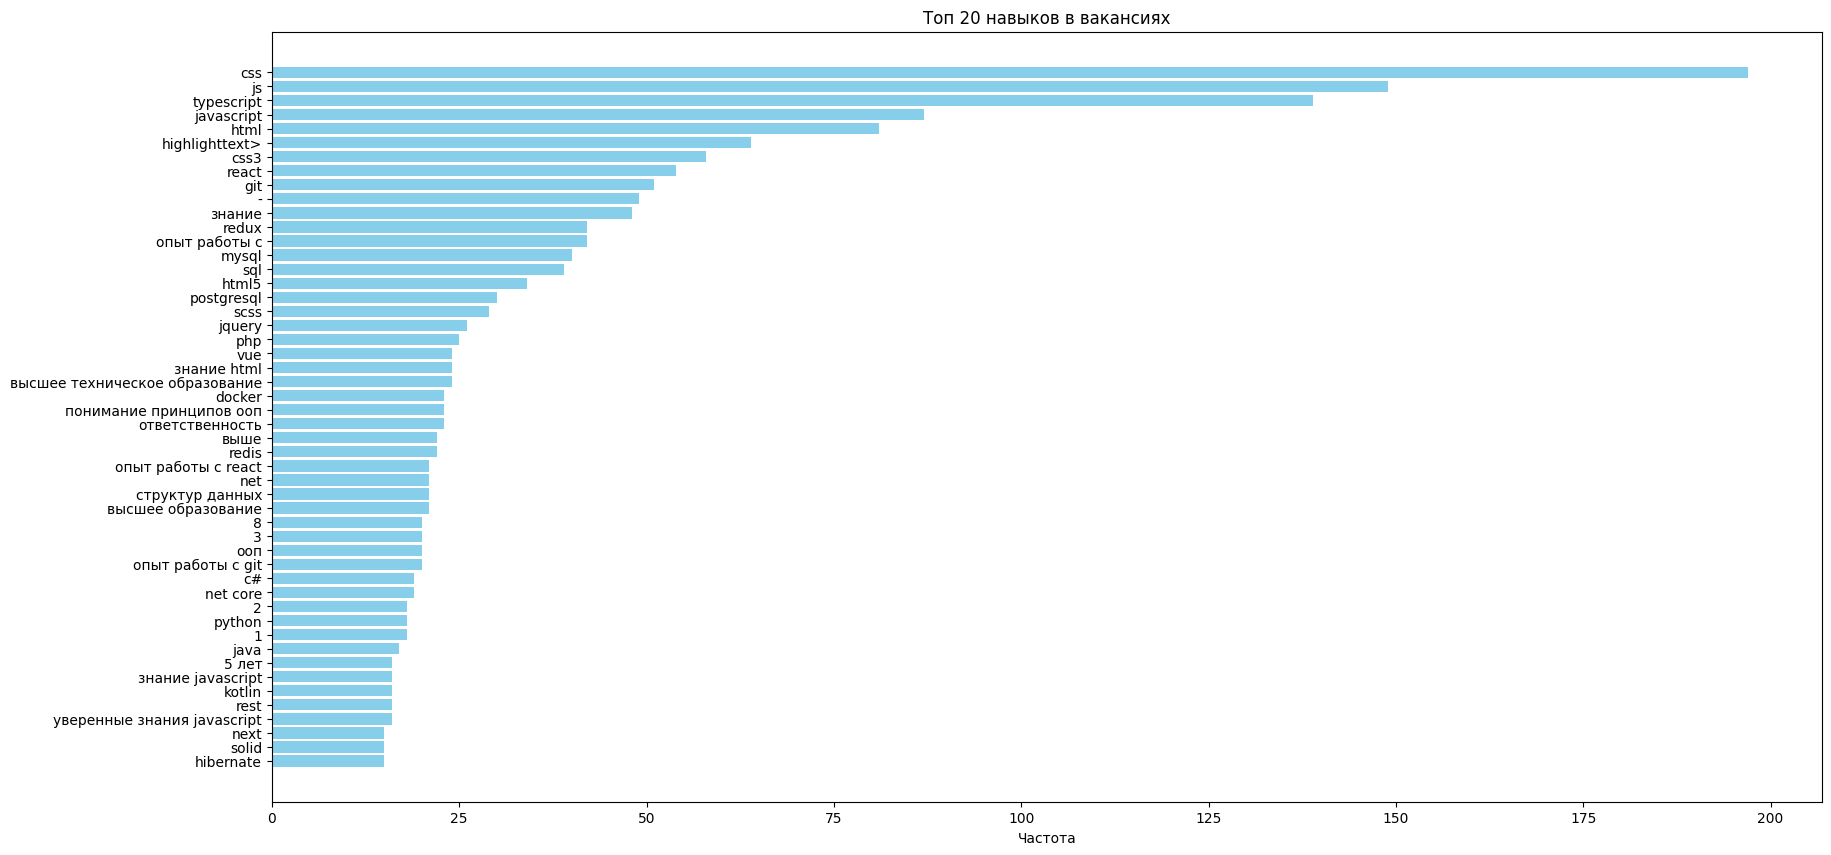

In [29]:
# Загрузка данных из файла
with open('vacancies_1.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Создание DataFrame
df = pd.DataFrame(data)

# Извлечение ключевых слов из поля 'requirement' в 'snippet'
df['requirements'] = df['snippet'].apply(lambda x: x.get('requirement', ''))

# Функция для разбора ключевых навыков
def parse_skills(text):
    if not text:
        return []
    # Попробуем улучшить разбор, используя регулярные выражения
    text = text.replace('.', ',').replace(';', ',').replace('/', ',').replace(' и ', ',')
    skills = [skill.strip().lower() for skill in text.split(',') if skill.strip()]
    return skills

# Применение функции к DataFrame
df['parsed_skills'] = df['requirements'].apply(parse_skills)

# Создание списка всех навыков
all_skills = [skill for sublist in df['parsed_skills'] for skill in sublist]

# Подсчет частотности каждого навыка
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common()

# Создание DataFrame для топ-20 навыков
top_skills_df = pd.DataFrame(top_skills[:50], columns=['Навык', 'Частота'])

# Построение графика
plt.figure(figsize=(20, 10))
plt.barh(top_skills_df['Навык'], top_skills_df['Частота'], color='skyblue')
plt.xlabel('Частота')
plt.title('Топ 20 навыков в вакансиях')
plt.gca().invert_yaxis()
plt.show()

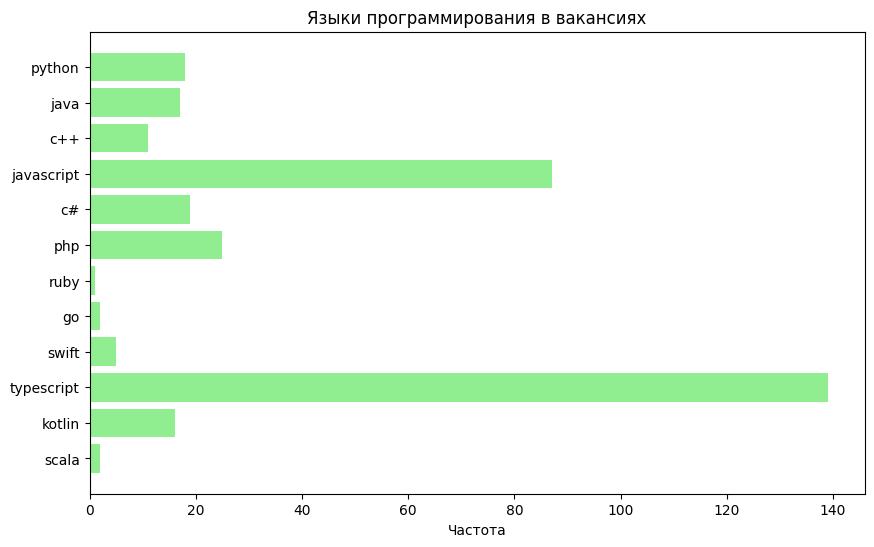

In [15]:
# Список для идентификации языков программирования
programming_languages = ['python', 'java', 'c++', 'javascript', 'c#', 'php', 'ruby', 'go', 'swift', 'typescript', 'kotlin', 'scala', 'rust']

# Фильтрация языков программирования
language_counts = {lang: skill_counts[lang] for lang in programming_languages if lang in skill_counts}

# Создание DataFrame для языков программирования
languages_df = pd.DataFrame(language_counts.items(), columns=['Язык программирования', 'Частота'])

# Построение графика для языков программирования
plt.figure(figsize=(10, 6))
plt.barh(languages_df['Язык программирования'], languages_df['Частота'], color='lightgreen')
plt.xlabel('Частота')
plt.title('Языки программирования в вакансиях')
plt.gca().invert_yaxis()
plt.show()